<a href="https://colab.research.google.com/github/ritwiks9635/Object_Recognition_And_Detection-/blob/main/Brain_Tumor_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Brain Tumor Detection**

In [1]:
#https://www.kaggle.com/datasets/davidbroberts/brain-tumor-object-detection-datasets

In [ ]:
!unzip /content/https:/www.kaggle.com/datasets/davidbroberts/brain-tumor-object-detection-datasets/brain-tumor-object-detection-datasets.zip

In [1]:
import numpy as np
import torch
import torchvision
import pandas as pd
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

import torch.nn as nn
import torch.nn.functional as F

plt.rcParams['figure.figsize'] = (15, 9)
plt.subplots_adjust(wspace=0, hspace=0.3)


np.random.seed(2023)

<Figure size 1500x900 with 0 Axes>

In [5]:
data_dir = "/content/axial_t1wce_2_class/"

path2label_train = os.path.join(data_dir, "labels/train")
path2label_test = os.path.join(data_dir, "labels/test")

path2image_train = os.path.join(data_dir, "images/train")
path2image_test = os.path.join(data_dir, "images/test")


files_label_train = os.listdir(path2label_train)
files_label_test = os.listdir(path2label_test)

with open("/content/axial_t1wce_2_class/labels/train/00095_170.txt", "r") as t:
    content = t.read()
    print(type(content.split()[0]))

<class 'str'>


In [6]:
train_labels = {
    "id" : [],
    "class" : [],
    "x_corr" : [],
    "y_corr" : [],
    "width" : [],
    "height" : []
    }


test_labels = {
    "id" : [],
    "class" : [],
    "x_corr" : [],
    "y_corr" : [],
    "width" : [],
    "height" : []
    }


for train in files_label_train:
    train_path = os.path.join(path2label_train, train)
    with open(train_path, "r") as t:
        content = t.read()
        train_labels["id"].append(train[:-4])
        train_labels["class"].append(int(content.split()[0]))
        train_labels["x_corr"].append(float(content.split()[1]))
        train_labels["y_corr"].append(float(content.split()[2]))
        train_labels["width"].append(float(content.split()[3]))
        train_labels["height"].append(float(content.split()[4]))
        #print(content[0])


for test in files_label_test:
    test_path = os.path.join(path2label_test, test)
    with open(test_path, "r") as t:
        content = t.read()
        test_labels["id"].append(test[:-4])
        test_labels["class"].append(int(content.split()[0]))
        test_labels["x_corr"].append(float(content.split()[1]))
        test_labels["y_corr"].append(float(content.split()[2]))
        test_labels["width"].append(float(content.split()[3]))
        test_labels["height"].append(float(content.split()[4]))

In [7]:
train_label_df = pd.DataFrame(train_labels)
test_label_df = pd.DataFrame(test_labels)

train_label_df.head()

,id,class,x_corr,y_corr,width,height
0,00099_149,0,0.380282,0.767606,0.089202,0.100939
1,00151_15,0,0.557512,0.355634,0.166667,0.248826
2,00273_86,1,0.710485,0.459507,0.198748,0.226526
3,00332_141,1,0.376369,0.532864,0.131455,0.100939
4,00304_98,1,0.297340,0.505282,0.214397,0.221831


In [8]:
train_label_df["class"].value_counts()

class
1    174
0    122
Name: count, dtype: int64

In [9]:
os.makedirs("./Data/labels/")

In [10]:
train_label_df.to_csv("./Data/labels/" + "train_labels.csv")

test_label_df.to_csv("./Data/labels/" + "test_labels.csv")

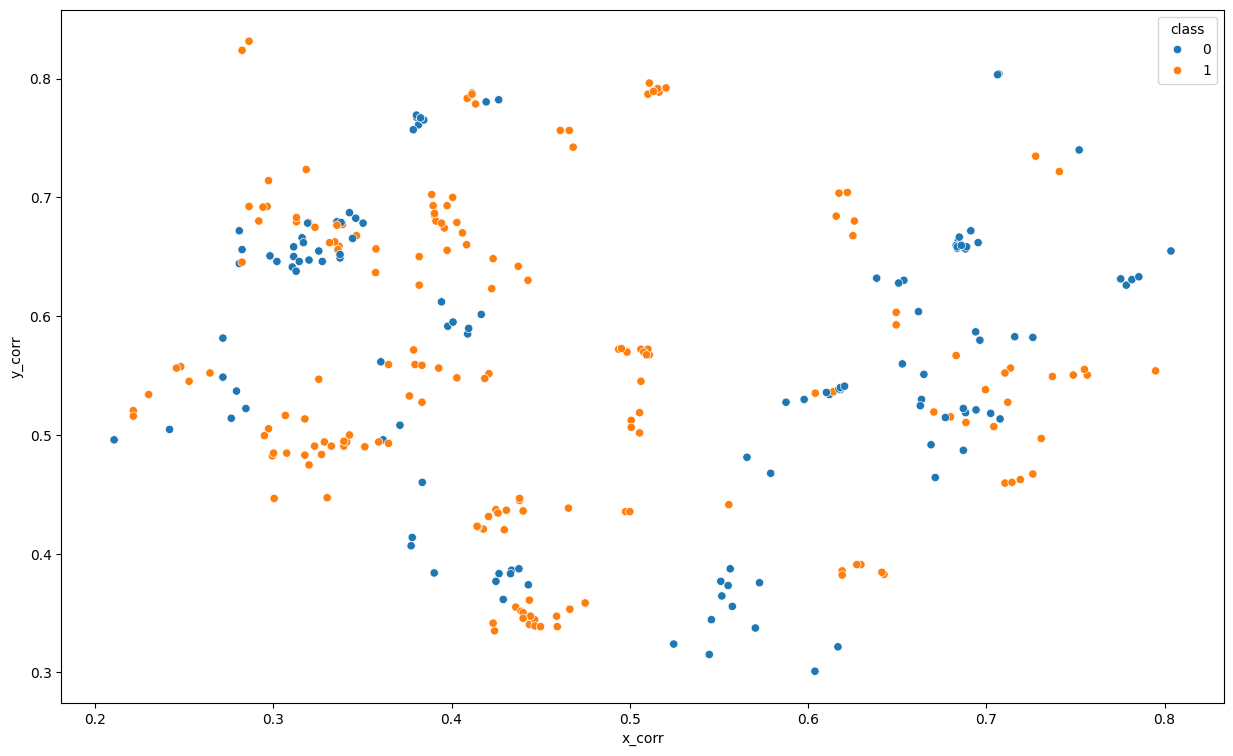

In [11]:
import seaborn as sns

sns.scatterplot(x = train_label_df["x_corr"], y = train_label_df["y_corr"], hue = train_label_df["class"])

plt.show()

In [12]:
os.listdir(data_dir + "/images")

['train', 'test']

In [13]:
train_label_df.loc[18]

id        00322_127
class             1
x_corr      0.35133
y_corr     0.490023
width      0.203443
height     0.212441
Name: 18, dtype: object

In [14]:
import cv2

(192, 256)
(256, 192)


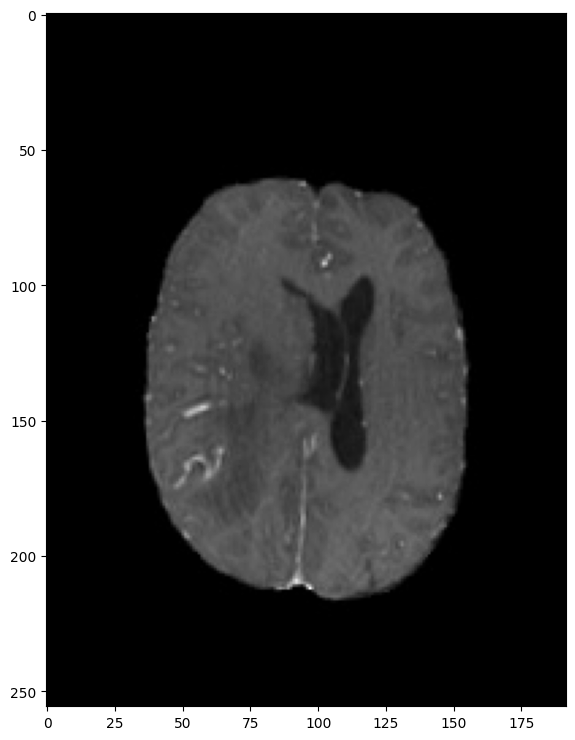

In [15]:
img = Image.open(os.path.join(path2image_train, train_label_df["id"][19] + ".jpg"))
print(img.size)
img_arr = np.array(img)
print(img_arr.shape)
#im_c = cv2.rectangle(img_arr, (175, 290), (1, 1), (0, 0, 255))

plt.imshow(img_arr, cmap = "gray")

In [16]:
def load_img_label(data_path, labels_df, id):
    imgName = labels_df["id"]
    image = Image.open(os.path.join(data_path, imgName[id] + ".jpg"))
    img_w, img_h =  image.size

    x = labels_df["x_corr"][id] * img_w
    y = labels_df["y_corr"][id] * img_h
    w = labels_df["width"][id] * img_w
    h = labels_df["height"][id] * img_h

    label = (x, y, w, h)
    return image, label

In [17]:
train_df_copy, test_df_copy = train_label_df.copy(), test_label_df.copy()

In [18]:
for i in range(len(train_df_copy)):
    label = load_img_label(path2image_train, train_df_copy, i)[1]
    train_df_copy.loc[i, "x_corr"] = label[0]
    train_df_copy.loc[i, "y_corr"] = label[1]
    train_df_copy.loc[i, "width"] = label[2]
    train_df_copy.loc[i, "height"] = label[3]

In [19]:
for i in range(len(test_df_copy)):
    label = load_img_label(path2image_test, test_df_copy, i)[1]
    test_df_copy.loc[i, "x_corr"] = label[0]
    test_df_copy.loc[i, "y_corr"] = label[1]
    test_df_copy.loc[i, "width"] = label[2]
    test_df_copy.loc[i, "height"] = label[3]

In [20]:
train_df_copy.to_csv("/content/Data/labels/" + "train_label_noscale.csv")
test_df_copy.to_csv("/content/Data/labels/" + "test_label_noscale.csv")

In [21]:
train_df_copy.head()

,id,class,x_corr,y_corr,width,height
0,00099_149,0,97.352192,196.507136,22.835712,25.840384
1,00151_15,0,142.723072,91.042304,42.666752,63.699456
2,00273_86,1,136.413120,117.633792,38.159616,57.990656
3,00332_141,1,72.262848,136.413184,25.239360,25.840384
4,00304_98,1,57.089280,129.352192,41.164224,56.788736


In [22]:
def show_img_label(img, label, thickness = 2):
    img_x, img_y = img.size
    cx, cy, w, h = label

    if label[0] < 1 and label[1] < 1 and label[2] < 1 and label[3] < 1:
        cx = cx*img_x
        cy = cy*img_y
        w = w*img_x
        h = h*img_y
    else:
        pass
    draw = ImageDraw.Draw(img)
    draw.rectangle(((cx-w/2, cy-h/2), (cx+w/2, cy+h/2)), outline = "blue", width = thickness)
    plt.imshow(img, cmap="gray")

In [23]:
ids = train_label_df.index
nrows, ncols = 2,3
rndIds = np.random.choice(ids, nrows*ncols)

(192, 256) (114.779328, 135.66208, 39.361536, 32.751104)
(192, 256) (99.906048, 202.817024, 21.633792, 22.234624)
(256, 256) (171.868672, 118.835712, 19.83104, 27.94368)
(192, 256) (72.262848, 136.413184, 25.239359999999998, 25.840384)
(256, 256) (98.40384, 195.906048, 17.126656, 18.028288)
(256, 256) (158.497536, 97.802752, 10.51648, 8.11264)


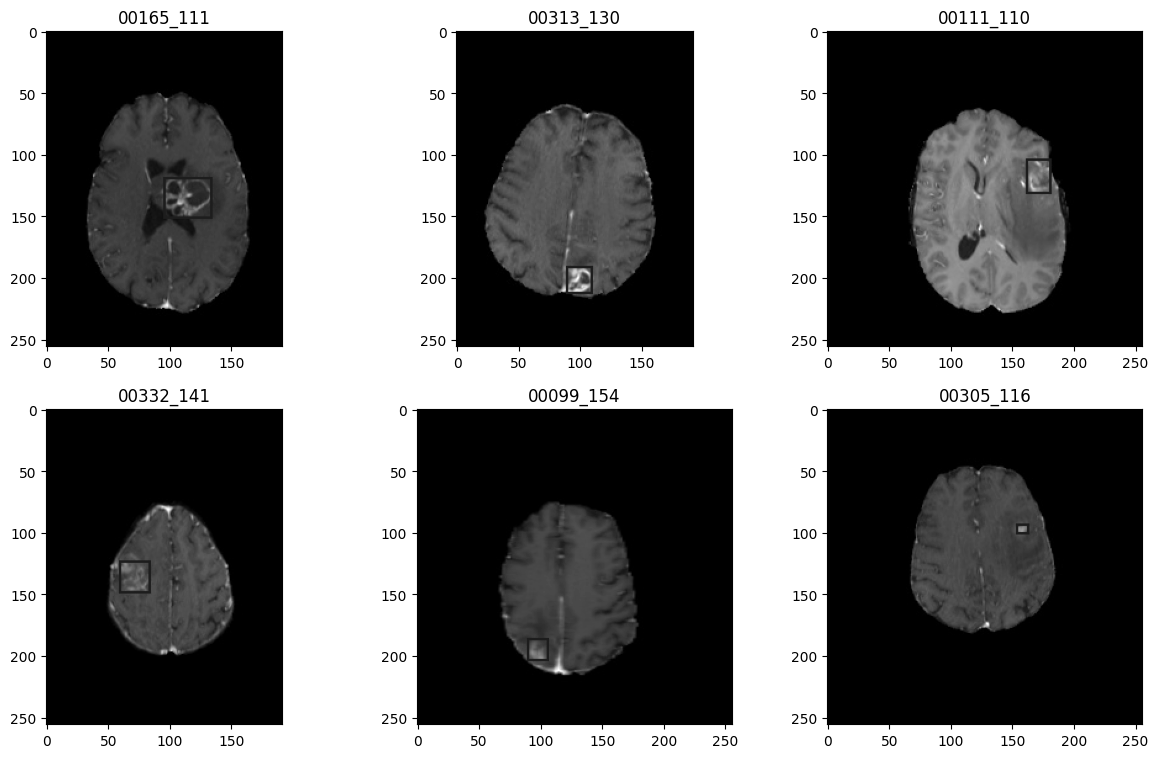

In [24]:
for i, id in enumerate(rndIds):
    img, label = load_img_label(path2image_train, train_label_df, id)
    print(img.size, label)
    plt.subplot(nrows, ncols, i+1)
    show_img_label(img, label)
    plt.title(train_label_df["id"][id])

In [25]:
import  torchvision.transforms.functional as TF

In [26]:
def resize_img_label(image, label = (0., 0., 0., 0.), target_size = (192, 192)):
    img_w, img_h = image.size
    tar_w, tar_h = target_size
    cx, cy, w, h = label
    resize_img = TF.resize(image, target_size)
    resize_labs = [(cx / img_w) * tar_w, (cy / img_h) * tar_h, (w / img_w) * tar_w, (h / img_h) * tar_h]
    return resize_img, resize_labs

In [27]:
img, label = load_img_label(path2image_train, train_label_df, 1)
print(img.size, label)

img_r, label_r = resize_img_label(img, label)
print(img_r.size, label_r)

(256, 256) (142.723072, 91.042304, 42.666752, 63.699456)
(192, 192) [107.042304, 68.281728, 32.000064, 47.774592]


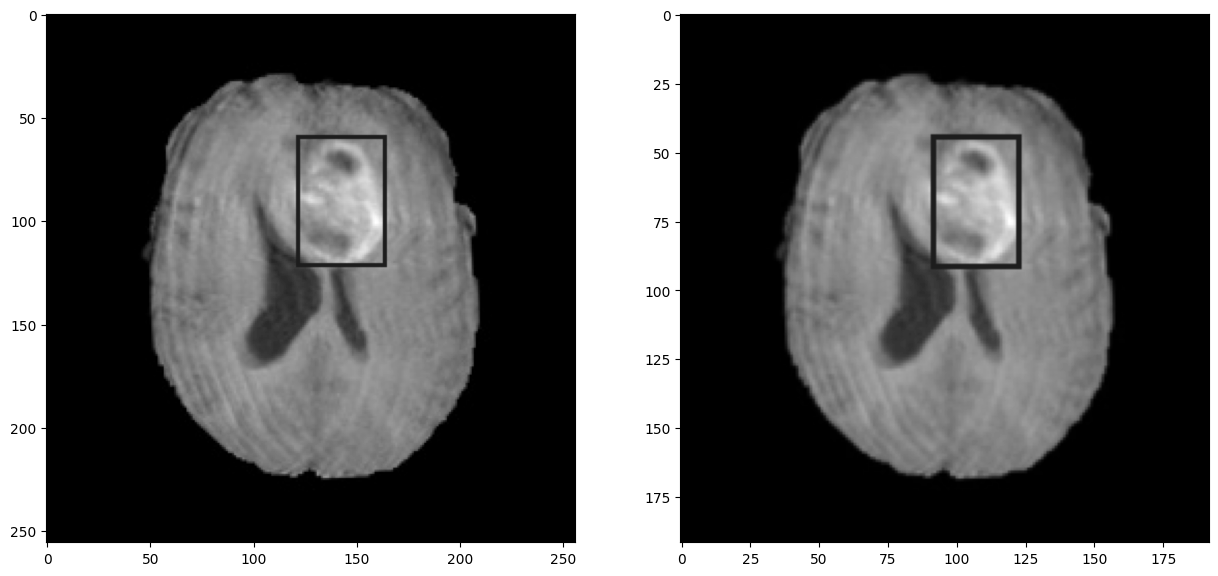

In [28]:
plt.subplot(1, 2, 1)
show_img_label(img, label)
plt.subplot(1, 2, 2)
show_img_label(img_r, label_r)

In [29]:
def random_hflip(image, label):
    w, h = image.size
    x, y, cw, ch = label
    image = TF.hflip(image)
    label = w-x, y, cw, ch
    return image, label

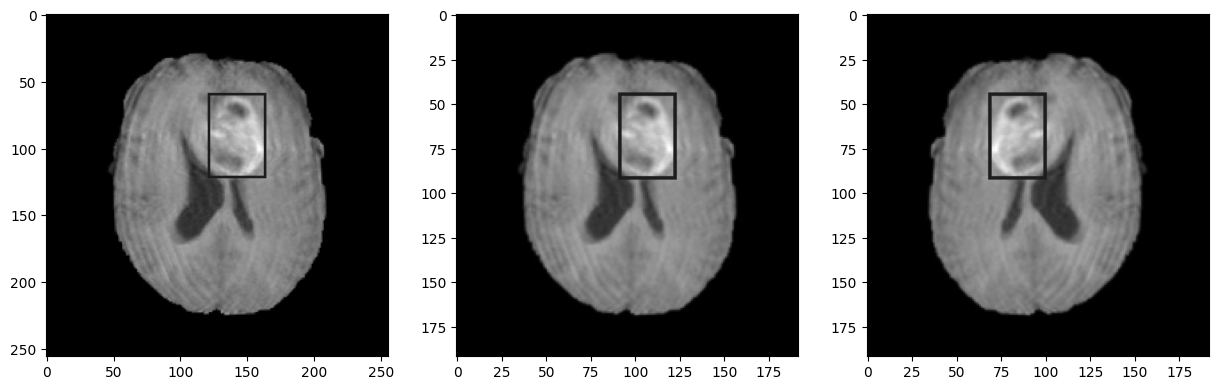

In [30]:
img, label = load_img_label(path2image_train, train_label_df, 1)
img_r, label_r = resize_img_label(img, label)
img_fh, label_fh = random_hflip(img_r, label_r)

plt.subplot(1, 3, 1)
show_img_label(img, label)
plt.subplot(1, 3, 2)
show_img_label(img_r, label_r)
plt.subplot(1, 3, 3)
show_img_label(img_fh, label_fh)

In [31]:
def random_vflip(image, label):
    w, h = image.size
    x, y, cw, ch = label
    image = TF.vflip(image)
    label = x, h-y, cw, ch
    return image, label

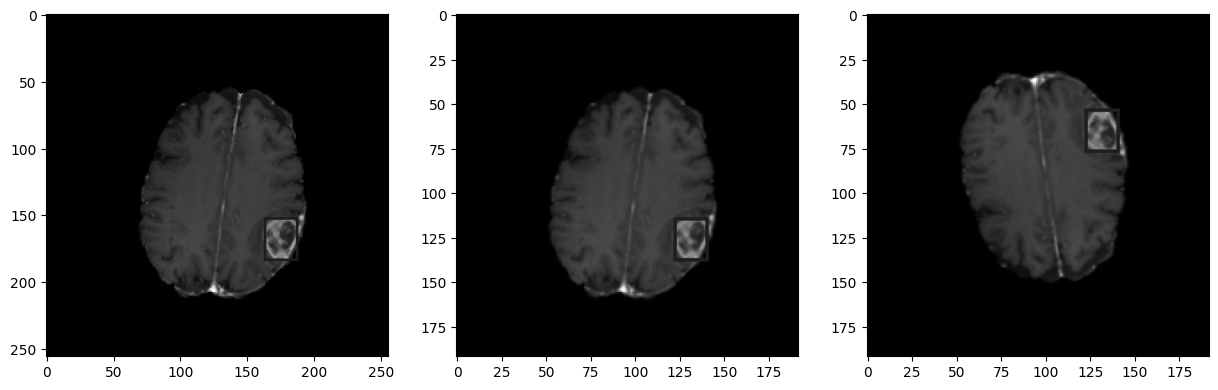

In [32]:
img, label = load_img_label(path2image_train, train_label_df, 10)
img_r, label_r = resize_img_label(img, label)
img_fv, label_fv = random_vflip(img_r, label_r)

plt.subplot(1, 3, 1)
show_img_label(img, label)
plt.subplot(1, 3, 2)
show_img_label(img_r, label_r)
plt.subplot(1, 3, 3)
show_img_label(img_fv, label_fv)

In [33]:
import numpy as np
np.random.seed(1)

def random_shift(image, label, max_translate = (0.25, 0.25)):
    w, h = image.size
    max_t_w, max_t_h = max_translate
    cx, cy, cw, ch = label
    trans_coef = np.random.rand()*2 - 1
    w_t = int(trans_coef * max_t_w * w)
    h_t = int(trans_coef * max_t_h * h)
    image = TF.affine(image, translate = (w_t, h_t), shear=0, angle=0, scale=1)
    label = cx+w_t, cy+h_t, cw, ch
    return image, label

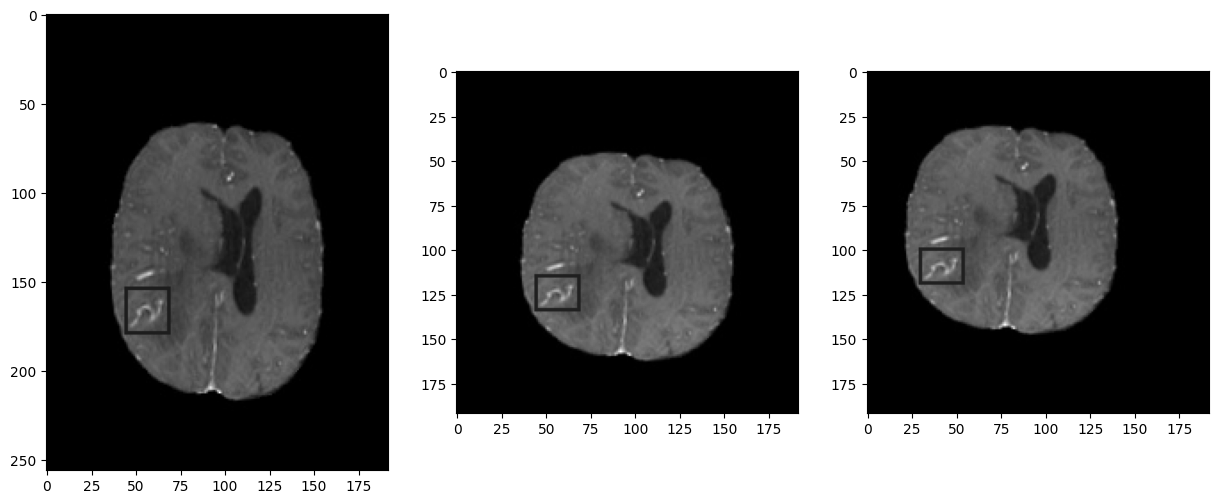

In [34]:
img, label = load_img_label(path2image_train, train_label_df, 19)
img_r, label_r = resize_img_label(img, label)
img_t, label_t = random_shift(img_r, label_r, max_translate=(0.5, 0.5))

plt.subplot(1, 3, 1)
show_img_label(img, label)
plt.subplot(1, 3, 2)
show_img_label(img_r, label_r)
plt.subplot(1, 3, 3)
show_img_label(img_t, label_t)

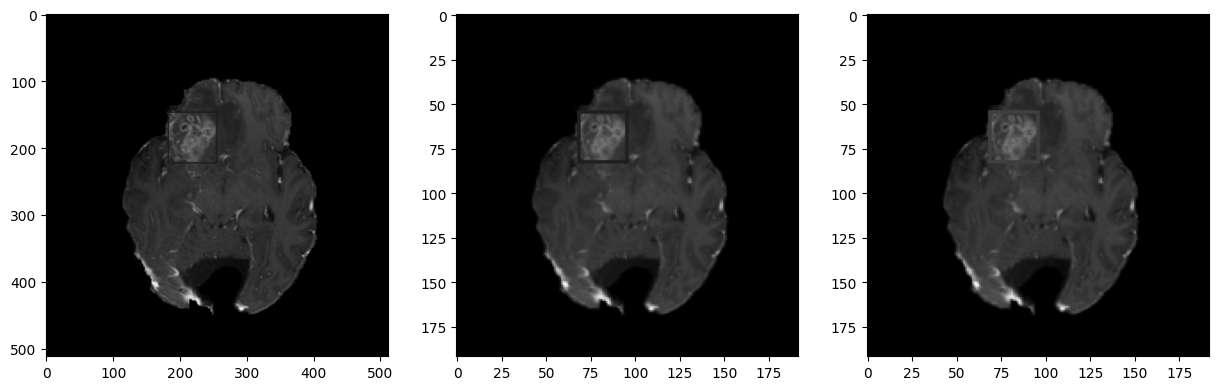

In [35]:
img, label = load_img_label(path2image_train, train_label_df, 91)
img_r, label_r = resize_img_label(img, label)
img_b = TF.adjust_brightness(img_r, brightness_factor=0.5)
label_b = label_r

plt.subplot(1, 3, 1)
show_img_label(img, label)
plt.subplot(1, 3, 2)
show_img_label(img_r, label_r)
plt.subplot(1, 3, 3)
show_img_label(img_b, label_b)

In [36]:
# contrast
img_c = TF.adjust_contrast(img_r, contrast_factor=0.4)

# gamma correction
img_g = TF.adjust_gamma(img_r, gamma=1.4)

In [37]:
# returning the label to [0, 1]
# specefically for object detection this transformation is vital for model convergence
def scale_label(a,b):
    scale = [ai/bi for ai, bi in zip(a, b + b)]
    return scale

In [38]:
def transformer(image, label, params):
    image, label = resize_img_label(image, label, params["target_size"])
    if np.random.rand() < params["p_hflip"]:
        image, label = random_hflip(image, label)
#         print(label, "hflip")
    if np.random.rand() < params["p_vflip"]:
        image, label = random_vflip(image, label)
#         print(label, "vflip")
    if np.random.rand() < params["p_shift"]:
        image, label = random_shift(image, label, params["max_translate"])
#         print(label, "shift")
    if np.random.rand() < params["p_brightness"]:
        brightness_factor = 1 + (np.random.rand() * 2 - 1) * params["brightness_factor"]
        image = TF.adjust_brightness(image, brightness_factor)
#         print(label, "bright")
    if np.random.rand() < params["p_contrast"]:
        contrast_factor = 1 + (np.random.rand() * 2 - 1) * params["contrast_factor"]
        image = TF.adjust_contrast(image, contrast_factor)
#         print(label, "contrast")
    if np.random.rand() < params["p_gamma"]:
        gamma_factor = 1 + (np.random.rand() * 2 - 1) * params["gamma_factor"]
        image = TF.adjust_gamma(image, gamma_factor)
#         print(label, "gamma")
    if params["scale_label"]:
        label = scale_label(label, params["target_size"])
    image = TF.to_tensor(image)
    return image, label

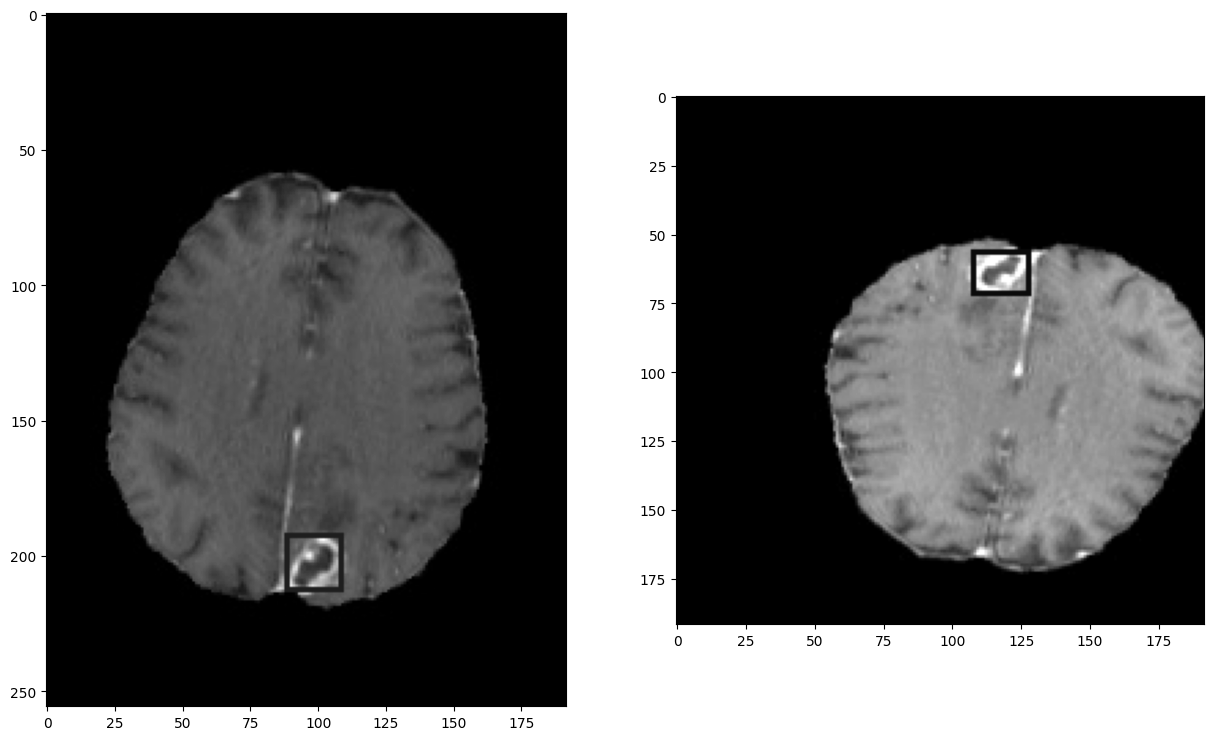

In [39]:
np.random.seed(34)
img, label = load_img_label(path2image_train, train_label_df, 240)
params = {
    "target_size": (192, 192),
    "p_hflip": 1.0,
    "p_vflip": 1.0,
    "p_shift": 1.0,
    "max_translate": (0.5, 0.5),
    "p_brightness": 1.0,
    "brightness_factor": 0.8,
    "p_contrast": 1.0,
    "contrast_factor": 0.8,
    "p_gamma": 1.0,
    "gamma_factor": 0.4,
    "scale_label": False,
}

img_t, label_t = transformer(img, label, params)

# let's fall into drawing
plt.subplot(1, 2, 1)
show_img_label(img, label)
plt.subplot(1, 2, 2)
show_img_label(TF.to_pil_image(img_t), label_t)

In [40]:
pd.read_csv("/content/Data/labels/test_label_noscale.csv").head()

,Unnamed: 0,id,class,x_corr,y_corr,width,height
0,0,00018_109,0,156.544512,136.863744,39.662080,20.131328
1,1,00018_121,0,153.239552,159.248896,43.868672,61.896704
2,2,00053_253,0,309.784064,227.455488,52.281856,54.685696
3,3,00084_123,0,88.037632,112.976640,16.826368,16.225280
4,4,00022_88,0,110.272256,165.408512,22.234624,23.136256


In [41]:
class MRI_dst(torch.utils.data.Dataset):
    def __init__(self, path2data, transform, trans_params, train=True):
        self.sit = "train" if train else "test"
        path2label = "/content/Data/labels/" + self.sit + "_label_noscale.csv"
        labels = pd.read_csv(path2label, index_col="id")
        labels.columns.values[0] = "idx"
        self.labels = labels[["x_corr", "y_corr", "width", "height"]].values
        self.ids = labels.index
        self.imgname = self.ids + ".jpg"
        self.path2img = path2data + "/images/" + self.sit + "/" + self.imgname
        self.transform = transform
        self.trans_params = trans_params
    def __len__(self):
        return len(self.labels)
    def __getitem__(self, idx):
        image = Image.open(self.path2img[idx])
        label = self.labels[idx]
        image, label = self.transform(image, label, self.trans_params)
        return image, label

In [42]:
trans_params_train = {
    "target_size": (192, 192),
    "p_hflip": 1.0,
    "p_vflip": 1.0,
    "p_shift": 1.0,
    "max_translate": (0.2, 0.2),
    "p_brightness": 1.0,
    "brightness_factor": 0.2,
    "p_contrast": 1.0,
    "contrast_factor": 0.2,
    "p_gamma": 1.0,
    "gamma_factor": 0.2,
    "scale_label": True,
}



trans_params_val = {
    "target_size": (192, 192),
    "p_hflip": 0.0,
    "p_vflip": 0.0,
    "p_shift": 0.0,
    "max_translate": (0.2, 0.2),
    "p_brightness": 0.0,
    "brightness_factor": 0.0,
    "p_contrast": 0.0,
    "contrast_factor": 0.0,
    "p_gamma": 0.0,
    "gamma_factor": 0.0,
    "scale_label": False,
}

In [43]:
mri_ds1 = MRI_dst(data_dir, transformer, trans_params_train)
mri_ds2 = MRI_dst(data_dir, transformer, trans_params_val)

[0.7415326666666666, 0.5569246666666666, 0.099262, 0.070423]


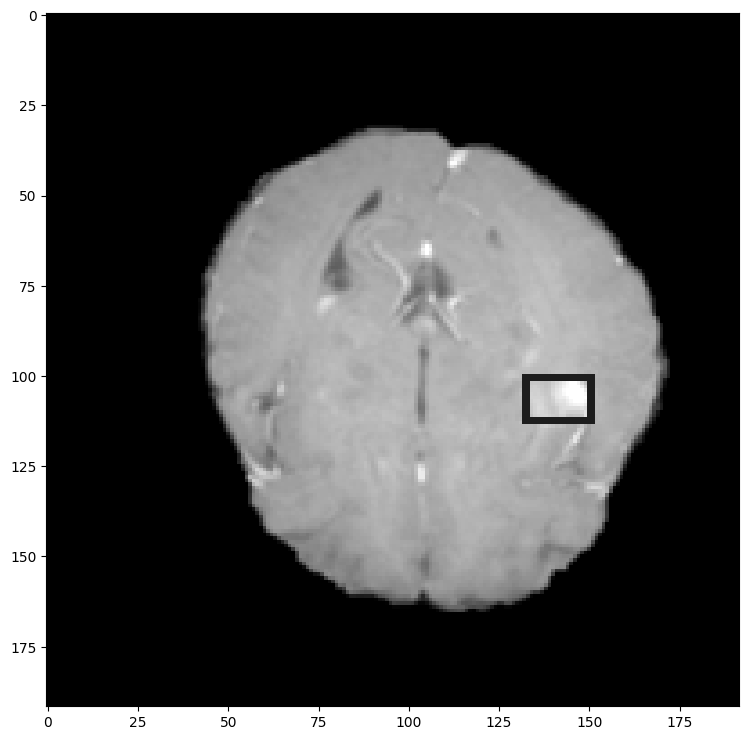

In [44]:
i, l = mri_ds1[222]
print(l)
show_img_label(TF.to_pil_image(i), l)

In [45]:
from sklearn.model_selection import train_test_split
train_ds, val_ds = train_test_split(mri_ds1, test_size=0.2, random_state=25)
print(len(train_ds), len(val_ds))

236 60


In [46]:
from torch.utils.data import DataLoader
train_dl = DataLoader(train_ds, batch_size=8, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=16, shuffle=False)

In [47]:
for img_b, label_b in train_dl:
    print(img_b.shape, img_b.dtype)
    print(label_b)
    break

torch.Size([8, 1, 192, 192]) torch.float32
[tensor([0.8497, 0.5511, 0.6354, 0.4617, 0.6093, 0.7893, 0.6870, 0.4951],
       dtype=torch.float64), tensor([0.6917, 0.6339, 0.4506, 0.5547, 0.4147, 0.4484, 0.5215, 0.5730],
       dtype=torch.float64), tensor([0.2066, 0.0493, 0.0986, 0.1663, 0.1174, 0.1440, 0.1925, 0.1565],
       dtype=torch.float64), tensor([0.2066, 0.0599, 0.0833, 0.1878, 0.0974, 0.1538, 0.1878, 0.1831],
       dtype=torch.float64)]


In [48]:
for img_b, label_b in train_dl:
    print(img_b.shape, img_b.dtype)

    label_b = torch.stack(label_b, 1)
    label_b = label_b.type(torch.float32)
    print(label_b.shape, label_b.dtype)
    break

for img_b, label_b in val_dl:
    print(img_b.shape, img_b.dtype)
    label_b = torch.stack(label_b, 1)
    label_b = label_b.type(torch.float32)
    print(label_b.shape, label_b.dtype)
    break

torch.Size([8, 1, 192, 192]) torch.float32
torch.Size([8, 4]) torch.float32
torch.Size([16, 1, 192, 192]) torch.float32
torch.Size([16, 4]) torch.float32


In [49]:
device = ("cuda" if torch.cuda.is_available() else "cpu")
print("Your Device is :: ",device)

Your Device is ::  cuda


In [50]:
class Net(nn.Module):
    def __init__(self, params):
        super().__init__()
        c, h, w = params["input_shape"]
        n_filters = params["initial_filters"]
        n_output = params["num_outputs"]

        self.conv1 = nn.Conv2d(c, n_filters, kernel_size = 3, stride = 2, padding = 1)
        self.conv2 = nn.Conv2d(n_filters + c, n_filters * 2, kernel_size = 3, stride = 1, padding = 1)
        self.conv3 = nn.Conv2d(3 * n_filters + c, n_filters * 4, kernel_size = 3, padding = 1)
        self.conv4 = nn.Conv2d(7 * n_filters + c, n_filters * 8, kernel_size = 3, padding = 1)
        self.conv5 = nn.Conv2d(15 * n_filters + c, n_filters * 16, kernel_size = 3, padding = 1)

        self.flatten = nn.Flatten()
        self.out = nn.Linear(16 * n_filters, n_output)

    def forward(self, x):
        identity = F.avg_pool2d(x, 4, 4)
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = torch.cat((x, identity), dim=1)

        identity = F.avg_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = torch.cat((x, identity), dim=1)

        identity = F.avg_pool2d(x, 2, 2)
        x = F.relu(self.conv3(x))
        x = F.max_pool2d(x, 2, 2)
        x = torch.cat((x, identity), dim=1)

        identity = F.avg_pool2d(x, 2, 2)
        x = F.relu(self.conv4(x))
        x = F.max_pool2d(x, 2, 2)
        x = torch.cat((x, identity), dim=1)

        x = F.relu(self.conv5(x))
        x = F.adaptive_avg_pool2d(x, 1)
        x = self.flatten(x)

        x = self.out(x)

        return x

In [51]:
params_model = {
    "input_shape": (1, 192, 192),
    "initial_filters": 16,
    "num_outputs": 4
}

model = Net(params_model)
model = model.to(device)

In [52]:
print(model)

Net(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv2): Conv2d(17, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(49, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(113, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(241, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (out): Linear(in_features=256, out_features=4, bias=True)
)


In [53]:
loss_func = nn.SmoothL1Loss(reduction="sum")

from torch import optim
opt = optim.Adam(model.parameters(), lr=1e-4)

In [54]:
n, c = 8, 4
y = 0.5 * torch.ones(n, c, requires_grad=True)
print(y.shape)

target = torch.zeros(n, c, requires_grad=False)
print(target.shape)

loss = loss_func(y, target)
print(loss.item())

y = 2 * torch.ones(n, c, requires_grad=True)
target = torch.zeros(n, c, requires_grad=False)
loss = loss_func(y, target)
print(loss.item())

torch.Size([8, 4])
torch.Size([8, 4])
4.0
48.0


In [55]:
def get_lr(opt):
    for param_group in opt.param_groups:
        return param_group["lr"]

current_lr = get_lr(opt)
print(f"current lr = {current_lr}")

current lr = 0.0001


In [56]:
from torch.optim.lr_scheduler import ReduceLROnPlateau
lr_scheduler = ReduceLROnPlateau(opt, mode="min", factor=0.5, patience=20, verbose=1)

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


In [57]:
for i in range(100):
    lr_scheduler.step(1)

In [58]:
# function to rescale labels
def rescale_label(a,b):
    x = int(len(a)/2) if len(a)>=2 else int(2)
    div = [ai*bi for ai,bi in zip(a, b*x)]
    return div

In [59]:
# IOU function for a batch of data
box = torch.rand(2, 4)
print(box)
print(box * 192)
def bbox(box):
    x = torchvision.ops.box_convert(torch.stack(rescale_label(box, (192, 192)), dim=0), in_fmt="cxcywh", out_fmt="xyxy")
    return x
print(bbox(box))

tensor([[0.4475, 0.9030, 0.8462, 0.8358],
        [0.7978, 0.2344, 0.7150, 0.6028]])
tensor([[ 85.9169, 173.3665, 162.4742, 160.4753],
        [153.1834,  45.0136, 137.2720, 115.7356]])
tensor([[  4.6798,  93.1289, 167.1540, 253.6041],
        [ 84.5474, -12.8542, 221.8194, 102.8814]])


In [60]:
rescale_label(target, (192, 192))

[tensor([0., 0., 0., 0.]),
 tensor([0., 0., 0., 0.]),
 tensor([0., 0., 0., 0.]),
 tensor([0., 0., 0., 0.]),
 tensor([0., 0., 0., 0.]),
 tensor([0., 0., 0., 0.]),
 tensor([0., 0., 0., 0.]),
 tensor([0., 0., 0., 0.])]

In [61]:
def metrics_batch(output, target):
    output = bbox(output)
    target = bbox(target)
    iou = torchvision.ops.box_iou(output, target)
    return torch.diagonal(iou, 0).sum().item()

In [62]:
# let's test metric function
n, c = 8, 4
target = torch.rand(n, c, device=device)
target = bbox(target)
metrics_batch(target, target)

8.0

In [63]:
# loss_batch
def loss_batch(loss_func, output, target, opt=None):
    loss = loss_func(output, target)
    with torch.no_grad():
        metric_b = metrics_batch(output, target)
    if opt is not None:
        opt.zero_grad()
        loss.backward()
        opt.step()
    return loss.item(), metric_b

In [64]:
# test loss_batch
for xb, label_b in train_dl:
    label_b = torch.stack(label_b, 1)
    label_b = label_b.type(torch.float32)
    label_b = label_b.to(device)
    l, m = loss_batch(loss_func, label_b, label_b)
    print(l, m)
    break

0.0 8.0


In [65]:
# train and evaluate the model
def loss_epoch(model, loss_func, dataset_dl, sanity_check=False, opt=None):
    running_loss = 0.0
    running_metric = 0.0
    len_data = len(dataset_dl.dataset)
    # internal loop
    for xb, yb in dataset_dl:
        yb = torch.stack(yb, 1)
        yb = yb.type(torch.float32).to(device)
        output = model(xb.to(device))
        loss_b, metric_b = loss_batch(loss_func, output, yb, opt)
        running_loss += loss_b
        if metric_b is not None:
            running_metric += metric_b
        if sanity_check is True:
            break
    loss = running_loss/float(len_data)
    metric = running_metric/float(len_data)
    return loss, metric

In [66]:
# train_val function
import copy
def train_val(model, params):
    num_epochs = params["num_epochs"]
    loss_func = params["loss_func"]
    opt = params["optimizer"]
    train_dl = params["train_dl"]
    val_dl = params["val_dl"]
    sanity_check = params["sanity_check"]
    lr_scheduler = params["lr_scheduler"]
    path2weights = params["path2weights"]
    # keep track of loss and metric values
    loss_history = {
        "train": [],
        "val": []
    }
    metric_history = {
        "train": [],
        "val": []
    }
    best_model_wts = copy.deepcopy(model.state_dict())
    best_loss = float("inf")
    # epochs
    for epoch in range(num_epochs):
        current_lr = get_lr(opt)
        print(f"Epoch {epoch}/{num_epochs - 1}, current lr = {current_lr}")
        model.train()
        train_loss, train_metric = loss_epoch(model, loss_func, train_dl, sanity_check, opt)
        loss_history["train"].append(train_loss)
        metric_history["train"].append(train_metric)

        model.eval()
        with torch.no_grad():
            val_loss, val_metric = loss_epoch(model, loss_func, val_dl, sanity_check)
            loss_history["val"].append(val_loss)
            metric_history["val"].append(val_metric)

        if val_loss < best_loss:
            best_loss = val_loss
            best_model_wts = copy.deepcopy(model.state_dict())
            torch.save(model.state_dict(), path2weights)
            print("The best model updated!")

        lr_scheduler.step(val_loss)
        if current_lr != get_lr(opt):
            print("Loading best model weights!")
            model.load_state_dict(best_model_wts)

        print(f"train loss: {train_loss: .6f}, accuracy: {100*train_metric: .2f}")
        print(f"val loss: {val_loss: .6f}, accuracy: {100*val_metric: .2f}")
        print("-"*10)
    model.load_state_dict(best_model_wts)
    return model, loss_history, metric_history

In [67]:
path2models = "/content/models/"
if not os.path.exists(path2models):
    os.mkdir(path2models)

params_train = {
    "num_epochs": 1000,
    "optimizer": opt,
    "loss_func": loss_func,
    "train_dl": train_dl,
    "val_dl": val_dl,
    "sanity_check": False,
    "lr_scheduler": lr_scheduler,
    "path2weights": path2models+"weights_smoothl1.pt",
}

In [68]:
model, loss_hist, metric_hist = train_val(model, params_train)

Epoch 0/999, current lr = 6.25e-06
The best model updated!
train loss:  0.259406, accuracy:  0.00
val loss:  0.249032, accuracy:  0.00
----------
Epoch 1/999, current lr = 6.25e-06
The best model updated!
train loss:  0.226072, accuracy:  0.00
val loss:  0.212477, accuracy:  0.00
----------
Epoch 2/999, current lr = 6.25e-06
The best model updated!
train loss:  0.184317, accuracy:  0.03
val loss:  0.166238, accuracy:  0.07
----------
Epoch 3/999, current lr = 6.25e-06
The best model updated!
train loss:  0.135495, accuracy:  0.23
val loss:  0.113923, accuracy:  0.22
----------
Epoch 4/999, current lr = 6.25e-06
The best model updated!
train loss:  0.085006, accuracy:  0.89
val loss:  0.069111, accuracy:  0.36
----------
Epoch 5/999, current lr = 6.25e-06
The best model updated!
train loss:  0.050162, accuracy:  2.14
val loss:  0.044460, accuracy:  0.93
----------
Epoch 6/999, current lr = 6.25e-06
The best model updated!
train loss:  0.037292, accuracy:  2.98
val loss:  0.039177, accur

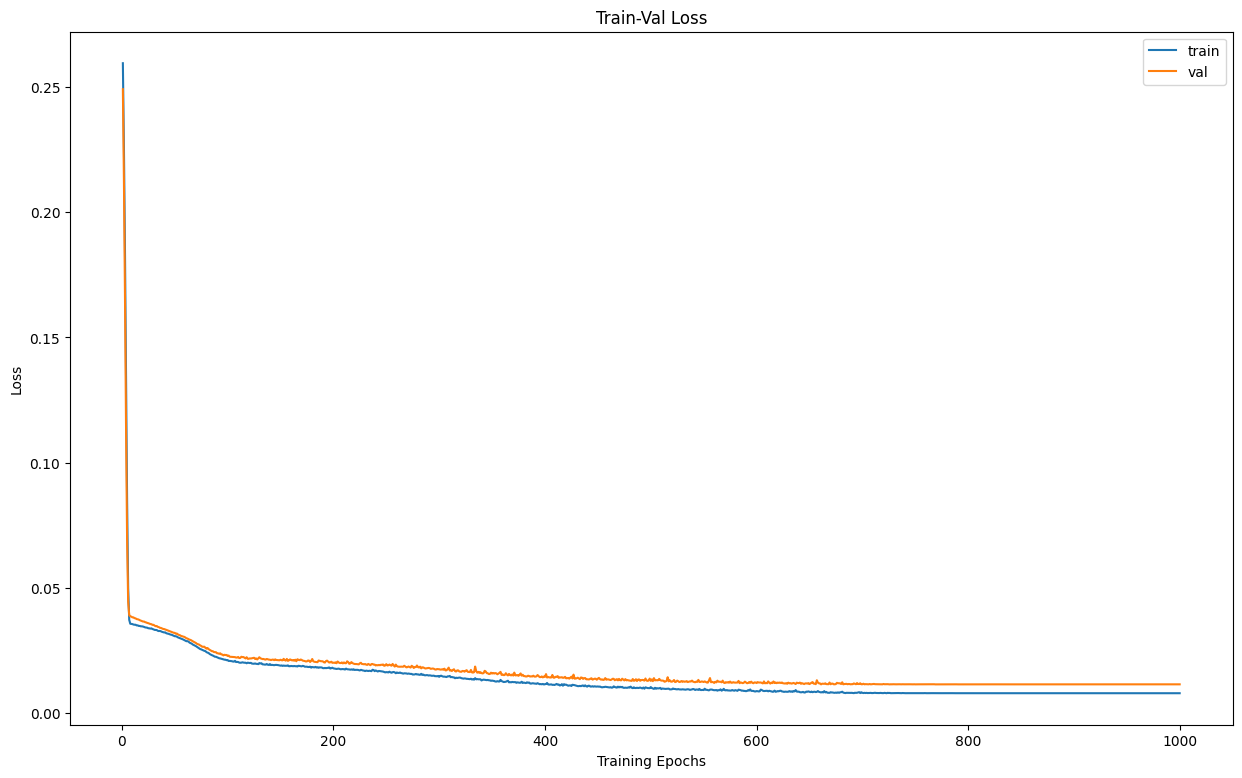

In [69]:
num_epochs=params_train["num_epochs"]
plt.title("Train-Val Loss")
plt.plot(range(1,num_epochs+1),loss_hist["train"],label="train")
plt.plot(range(1,num_epochs+1),loss_hist["val"],label="val")
plt.ylabel("Loss")
plt.xlabel("Training Epochs")
plt.legend()
plt.show()

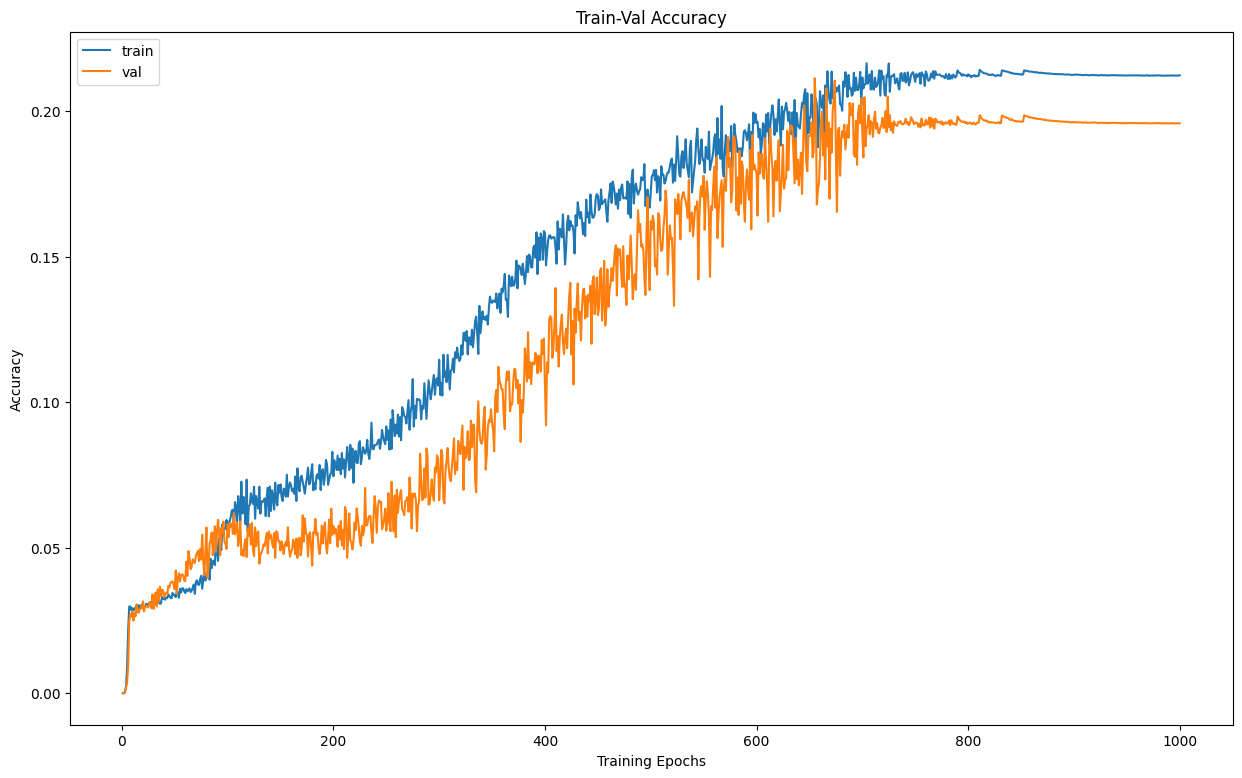

In [70]:
plt.title("Train-Val Accuracy")
plt.plot(range(1,num_epochs+1),metric_hist["train"],label="train")
plt.plot(range(1,num_epochs+1),metric_hist["val"],label="val")
plt.ylabel("Accuracy")
plt.xlabel("Training Epochs")
plt.legend()
plt.show()

In [71]:
# deploy the model
params_model={
"input_shape": (1,192,192),
"initial_filters": 16,
"num_outputs": 4,
}
model = Net(params_model)
model.eval()

Net(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv2): Conv2d(17, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(49, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(113, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(241, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (out): Linear(in_features=256, out_features=4, bias=True)
)

In [72]:
model=model.to(device)

In [75]:
path2weight = "/content/models/weights_smoothl1.pt"
model.load_state_dict(torch.load(path2weight))

<All keys matched successfully>

In [79]:
def show_tensor_2labels(img,label1,label2):
    label1=rescale_label(label1,img.shape[1:])
    label2=rescale_label(label2,img.shape[1:])
    img=TF.to_pil_image(img)
    cx, cy, w, h = label1
    draw = ImageDraw.Draw(img)
    draw.rectangle(((cx-w/2, cy-h/2), (cx+w/2,
    cy+h/2)),outline="green",width=2)
    cx,cy, w, h= label2
    draw.rectangle(((cx-w/2, cy-h/2), (cx+w/2,
    cy+h/2)),outline="red",width=2)
    plt.imshow(np.asarray(img), cmap="gray")

In [84]:
rndInds=np.random.randint(len(val_ds),size=10)
print(rndInds)

[15 47 16 22 14 59 32 15 14 43]


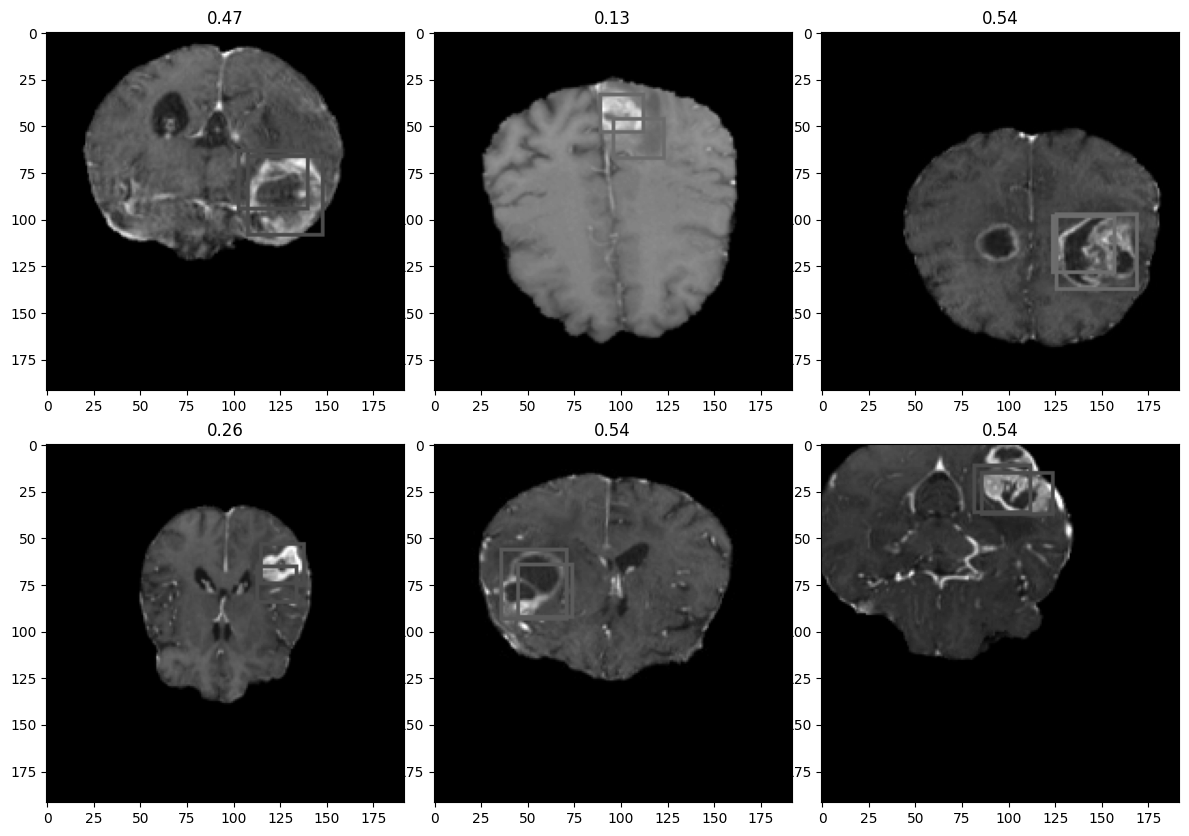

In [85]:
plt.rcParams['figure.figsize'] = (15, 10)
plt.subplots_adjust(wspace=0.0, hspace=0.15)
for i,rndi in enumerate(rndInds):
    img,label=val_ds[rndi]
    h,w=img.shape[1:]
    with torch.no_grad():
        label_pred=model(img.unsqueeze(0).to(device))[0].cpu()
    plt.subplot(2,3,i+1)
    show_tensor_2labels(img,label,label_pred)
    # calculate IOU
    label_bb=bbox(torch.tensor(label).unsqueeze(0))
    label_pred_bb=bbox(label_pred.unsqueeze(0))
    iou=torchvision.ops.box_iou(label_bb, label_pred_bb)
    plt.title("%.2f" %iou.item())
    if i>4:
        break

In [ ]:
#require more dataset to get better results